Importing the Dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


Data collection & processing

In [ ]:
# load data from csv file to pandas DataFrame
df = pd.read_csv('/content/titanic.csv')

In [ ]:
# printing the first 5 row of the DataFrame
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
# Number of row and column
df.shape

(418, 12)

In [ ]:
# getting some information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [ ]:
#check the number of missing values in each column
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Handling the missing value

In [ ]:
#drop the 'cabin' column from the dataframe
df = df.drop(columns='Cabin', axis=1)

In [ ]:
#Replacing the missing values in "Age" column with the mean value
df['Age'].fillna(df['Age'].mean(),inplace = True)


In [ ]:
#finding the mode value of "Embarked" column
print(df['Fare'].mode())

0    7.75
Name: Fare, dtype: float64


In [ ]:
print(df['Fare'].mode()[0])

7.75


In [ ]:
#Replacing the missing value in "Embarked" column with mode value
df['Fare'].fillna(df['Fare'].mode()[0],inplace = True)

In [ ]:
#check the number of missing values in each column
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

Data Analysis

In [ ]:
#getting some statistical measures about the data
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.560497
std,120.810458,0.481622,0.841838,12.634534,0.896760,0.981429,55.857145
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,30.272590,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,35.750000,1.000000,0.000000,31.471875
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [ ]:
#find the number of people survived and not survived
df['Survived'].value_counts()

0    266
1    152
Name: Survived, dtype: int64

Data Visualisation

In [ ]:
sns.set()

<Axes: xlabel='Survived', ylabel='count'>

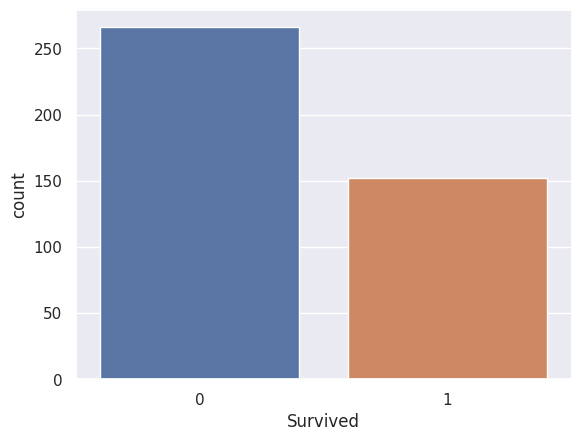

In [ ]:
#making a count plot for "Survived" column
sns.countplot(x='Survived', data = df)

In above graph the people Not Survived has 250 plus count and survived has 150 count

In [ ]:
df['Sex'].value_counts()

male      266
female    152
Name: Sex, dtype: int64

[Text(0.5, 1.0, 'Visulization of Survived or Not Survived on the basis of Gender')]

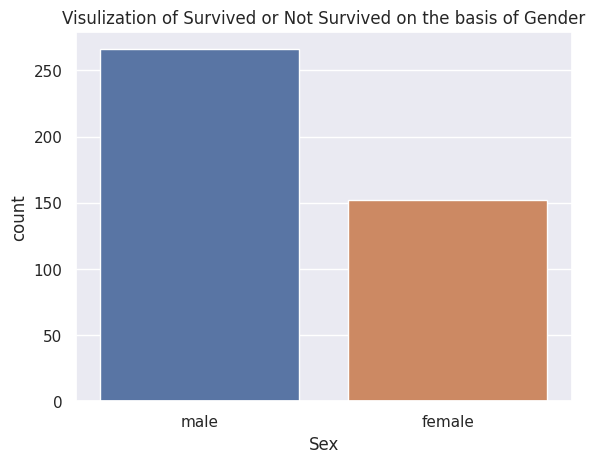

In [ ]:
#making a count plot for "sex" column
sns.countplot(x='Sex',data=df).set (title="Visulization of Survived or Not Survived on the basis of Gender")

<Axes: xlabel='Sex', ylabel='count'>

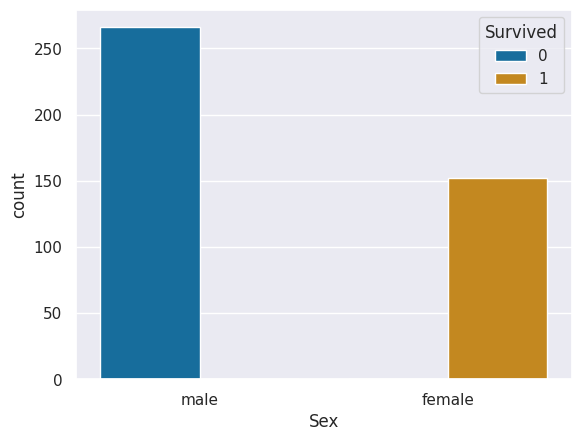

In [ ]:
#number of survivors Gender wise
sns.countplot(data=df, x='Sex' , hue='Survived',palette="colorblind")

<Axes: xlabel='Pclass', ylabel='count'>

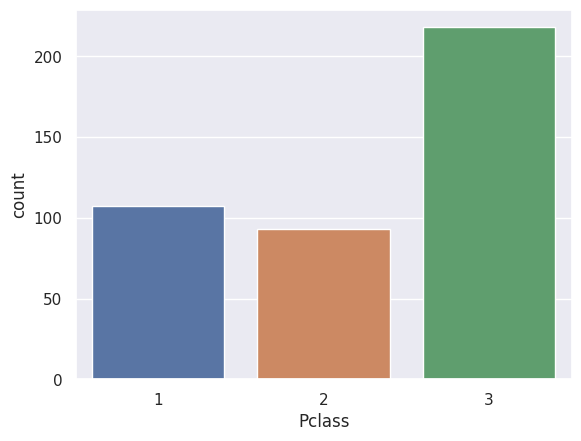

In [ ]:
#making a count plot for "Pclass"
sns.countplot(x='Pclass' , data=df)

<Axes: xlabel='Pclass', ylabel='count'>

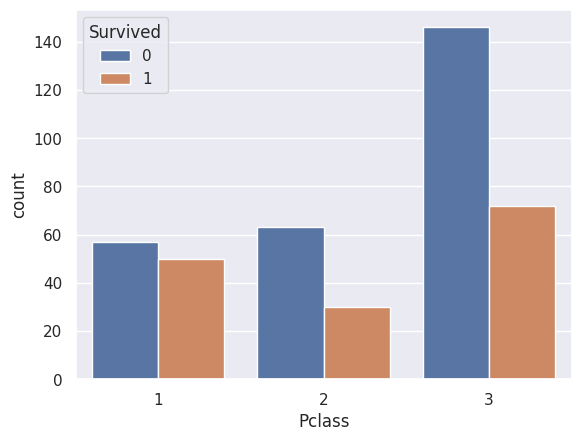

In [ ]:
sns.countplot(x='Pclass',hue='Survived', data=df)

Above we ploted a countplot of Pclass and Survived.In above blue represents the Not Survived and orange represents the survived.

Encoding the CategoricalColums

In [ ]:
#counting the number of male and female

df['Sex'].value_counts()

male      266
female    152
Name: Sex, dtype: int64

In [ ]:
df['Embarked'].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [ ]:
# replacing  the categorical  data to numeric

df.replace({'Sex':{'male':0,'female':1},'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,2
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,0
2,894,0,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,2
3,895,0,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,0
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,0


Separating Features and Target

In [ ]:
x=df.drop(columns=['PassengerId','Name','Ticket','Survived'],axis=1)
y=df['Survived']

In [ ]:
print(x)

     Pclass  Sex       Age  SibSp  Parch      Fare  Embarked
0         3    0  34.50000      0      0    7.8292         2
1         3    1  47.00000      1      0    7.0000         0
2         2    0  62.00000      0      0    9.6875         2
3         3    0  27.00000      0      0    8.6625         0
4         3    1  22.00000      1      1   12.2875         0
..      ...  ...       ...    ...    ...       ...       ...
413       3    0  30.27259      0      0    8.0500         0
414       1    1  39.00000      0      0  108.9000         1
415       3    0  38.50000      0      0    7.2500         0
416       3    0  30.27259      0      0    8.0500         0
417       3    0  30.27259      1      1   22.3583         1

[418 rows x 7 columns]


In [ ]:
print(y)

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64


In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

training data and splitting data and testing data

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
print(x.shape,x_train.shape,x_test.shape)

(418, 7) (334, 7) (84, 7)


Model Training

Logistic Regression

Y=1/1+e^-Z

In [ ]:
model=LogisticRegression()

In [ ]:
# Training Logistic Regression  model with training data

model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Model Evaluation.

Accuracy Score

In [ ]:
# Accuracy on training data

x_train_prediction=model.predict(x_train)

In [ ]:
# Here 1 represents the person is survived and 0 represents not survived.

print(x_train_prediction)

[1 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 1 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 1 0
 1 1 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 1 0 0
 0 0 1 1 1 0 0 1 1 0 1 1 0 0 0 0 0 0 0 1 1 0 0 1 1 1 1 0 1 0 0 0 0 1 0 1 1
 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 1 0 0 1 0 0
 1 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1
 0 1 1 1 1 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0
 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 1 1 1
 1]


In [ ]:
#accuracy on test data

y_test_prediction=model.predict(x_test)
print(y_test_prediction)

[0 0 0 1 1 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0 0 1
 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0
 0 1 1 0 1 0 0 0 0 0]


In [ ]:
print(classification_report(y_train,x_train_prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       215
           1       1.00      1.00      1.00       119

    accuracy                           1.00       334
   macro avg       1.00      1.00      1.00       334
weighted avg       1.00      1.00      1.00       334



In [ ]:
train_accuracy=accuracy_score(y_train,x_train_prediction)
print(train_accuracy)

1.0


In [ ]:
test_accuracy=accuracy_score(y_test,y_test_prediction)*100
print(test_accuracy)

100.0


In [ ]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34.5,0,0,7.8292,2
1,3,1,47.0,1,0,7.0000,0
2,2,0,62.0,0,0,9.6875,2
3,3,0,27.0,0,0,8.6625,0
4,3,1,22.0,1,1,12.2875,0


Taking User Input

In [ ]:
def User_Evaluation():
  Pclass=int(input("Enter the Pclass : "))
  Sex=int(input("Enter the Sex : "))
  Age=int(input('Enter Age : '))
  Sibsp= int(input("Enter the Sibsp : "))
  Parch=int(input("Enter the Parch : "))
  Fare=float(input("Enter the Fare : "))
  Embarked=int(input("Enter the  Embarked : "))
  return([[Pclass,Sex,Age,Sibsp,Parch,Fare,Embarked]])

In [ ]:
new_x=User_Evaluation()
pred=model.predict(new_x)
if pred==1:
  print('The Person is Survived.')
else :
  print("The Person is not Survived.")

Enter the Pclass : 4
Enter the Sex : 1
Enter Age : 20
Enter the Sibsp : 2
Enter the Parch : 2
Enter the Fare : 2
Enter the  Embarked : 3
The Person is Survived.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
